# Модель Фергюльста

## Рівняння моделі
$ N'=μN(k-N) \enspace | \enspace N_0 $

## Різницеве рівняння
$ \Delta t = 1 $

$ N'(t) \approx N(t+1)-N(t) - \text{різниця вперед} $

$ N'(t) \approx N(t)-N(t-1) - \text{різниця назад} $

$ N'(t) \approx \frac{N(t+1)-N(t-1)}{2} - \text{центральна різниця} $

Розглядатимемо для різниці вперед:

$ \Rightarrow \left \{ \begin{array}{ll}
                        N(t+1)-N(t)=\mu N(t)[k-N(t)] \\
                        N(0) = N_0
                       \end{array} \right. $

$ \iff \left \{ \begin{array}{ll}
                    N(t+1)=(\mu k+1)N(t)-\mu N^2(t) \\
                    N(0) = N_0
                \end{array} \right. $
                
Отже, лінійна регресійна залежність виглядає таким чином:

$ \left \{ \begin{array}{ll}
                  y_i = \theta_1 x_{i1} +  \theta_2 x_{i2} + \xi_i\\
                  \theta_1 = \mu k+1\\
                  \theta_2 = -\mu\\
                  E\xi = 0_n;\enspace cov(\xi) = \sigma^2I_n
                \end{array}
              \right. $
              
$ \Rightarrow \left \{ \begin{array}{ll}  
                  \mu = -\theta_2 \\
                  k = (1 - \theta_1) / \theta_2
                \end{array} \right. $

## Генерування вибірки

Initial parameters:	μ = 0.0001
			               k = 100
			N0 = 10

Noise generation: C = 3
Sample length: n = 50
Time starting from 0 to 500                with discretization frequency 10



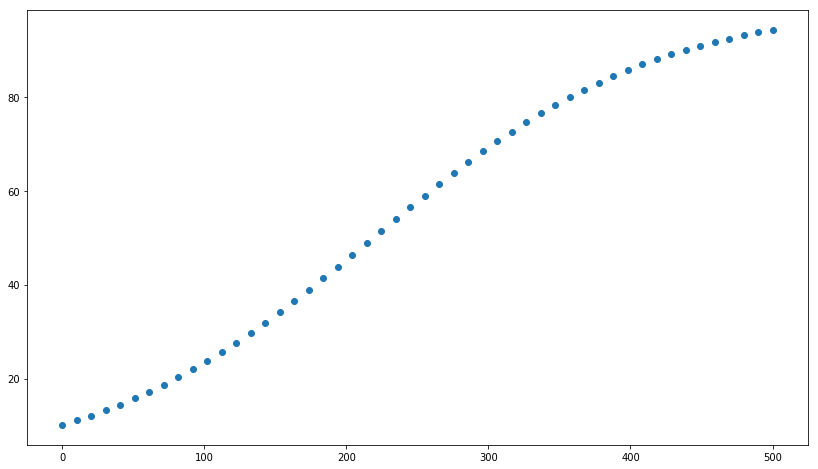

Intermediate parameters values: θ_1 = 1.01	θ_2 = -0.0001
Regression model: y = (1.01) * x1 + (-0.0001) * x2


,i,t,N(t),N^2(t),N(t+1)
0,1,0,10.000000,100.000000,10.090
1,2,10,10.956582,120.046684,11.054
2,3,20,11.992475,143.819461,12.098
3,4,30,13.111886,171.921546,13.226
4,5,40,14.318785,205.027597,14.441
5,6,51,15.616808,243.884680,15.749
6,7,61,17.009139,289.310822,17.150
7,8,71,18.498393,342.190549,18.649
8,9,81,20.086481,403.466709,20.247
9,10,91,21.774481,474.128027,21.945


In [41]:
config = VerhulstModelConfig()
config.show()

plt.scatter(config.t, config.y)
plt.show()
print('Intermediate parameters values: θ_1 = {}\tθ_2 = {}'.format(*config.theta))
print('Regression model: y = ({}) * x1 + ({}) * x2'.format(*config.theta))
config.df.head(10)

## Робота алгоритму МНКО

Recurrent Least Squares Method
	Step 1
h_1:		[0]
eta_1:		192021.11695382808
alpha_1:	[0]
beta_1:		192021.11695382808
gamma_1:	192454.57239914758
nu_1:		[1.00225733]
> θ_1: [1.00225733]
> H_1_inv:
[[5.20776056e-06]]
> RSS_1: 0.5984206103312317
	Step 2
h_2:		[14865979.31260227]
eta_2:		1210738873.994198
alpha_2:	[77.41846078]
beta_2:		[[59837637.56477976]]
gamma_2:	14893552.79759949
nu_2:		[[-0.0001]]
> θ_2: [ 1.00999944e+00 -1.00003420e-04]
> H_2_inv:
[[ 1.05372445e-04 -1.29380878e-06]
 [-1.29380878e-06  1.67118897e-08]]
> RSS_2: 3.3057016820547958e-06

INTERMEDIATE PARAMETERS
True values:	θ_1 = 1.01	θ_2 = -0.0001
Estimates:	θ_1* = 1.0099994430189054	θ_2* = -0.00010000341994466655

INITIAL PARAMETERS
True values:	μ = 0.0001	k = 100
Estimates:	μ* = 0.00010000341994466655	k* = 99.9910105518219


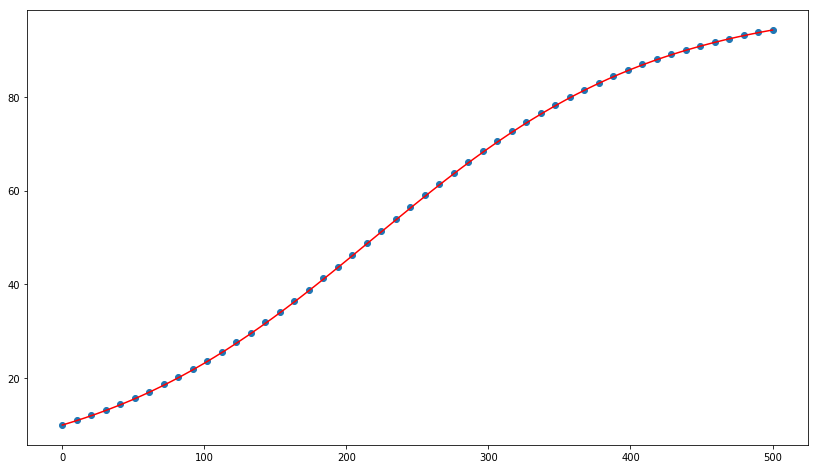

In [25]:
config.run_single_RMNK(verbose=True, deep_verbose=True)

## Таблиця залежності оцінок від рівня шуму

In [26]:
config.run_grid_RMNK(verbose=False)

,C,num_samples,θ_1,θ_1*,θ_2,θ_2*,μ,μ*,k,k*
0,0.0,10.0,1.01,0.998957,-0.0001,0.000044,0.0001,-0.000044,100.0,23.826999
1,0.0,50.0,1.01,1.010265,-0.0001,-0.000106,0.0001,0.000106,100.0,96.768521
2,0.0,100.0,1.01,1.009688,-0.0001,-0.000097,0.0001,0.000097,100.0,100.083587
3,2.0,10.0,1.01,1.009857,-0.0001,-0.000098,0.0001,0.000098,100.0,100.559471
4,2.0,50.0,1.01,1.009994,-0.0001,-0.000100,0.0001,0.000100,100.0,100.105598
5,2.0,100.0,1.01,1.009956,-0.0001,-0.000099,0.0001,0.000099,100.0,100.113571
6,5.0,10.0,1.01,1.010000,-0.0001,-0.000100,0.0001,0.000100,100.0,100.000233
7,5.0,50.0,1.01,1.010000,-0.0001,-0.000100,0.0001,0.000100,100.0,100.000141
8,5.0,100.0,1.01,1.010000,-0.0001,-0.000100,0.0001,0.000100,100.0,100.000091


---

# Рівняння згасаючих коливань

## Модель рівняння
$ x''+2\delta x'+\omega_0^2 x=0 $

## Різницеве рівняння
$ \Delta t = 1 $

$ x'(t) \approx x(t+1)-x(t) - \text{різниця вперед} $

$ x'(t) \approx x(t)-x(t-1) - \text{різниця назад} $

$ x'(t) \approx \frac{x(t+1)-x(t-1)}{2} - \text{центральна різниця} $

$ x''(t) \approx x(t+1)-2x(t)+x(t-1) $

Розглянемо для апроксимації різницею вперед:

$ \Rightarrow \left \{ \begin{array}{ll}
                          x(t+1)-2x(t)+x(t-1)+2\delta[x(t+1)-x(t)]+\omega_0^2 x(t)=0 \\
                          x(0) = x_0\\
                          x(1) = x(0) + x'(0) = x_0 + x'_0
                       \end{array} \right. $

$ \iff \left \{ \begin{array}{ll}
                    x(t+2)=\frac{2+2\delta-\omega_0^2}{1+2\delta}x(t+1)-\frac{1}{1+2\delta}x(t) \\
                    x(0) = x_0\\
                    x(1) = x_0 + x'_0
                 \end{array} \right. $

Отже, лінійна регресійна залежність виглядає таким чином:

$ \left \{ \begin{array}{ll}
                  y_i = \theta_1 x_{i1} +  \theta_2 x_{i2} + \xi_i\\
                  \theta_1 = \frac{2+2\delta-\omega_0^2}{1+2\delta}\\
                  \theta_2 = -\frac{1}{1+2\delta}\\
                  E\xi = 0_n;\enspace cov(\xi) = \sigma ^2I_n
                \end{array}
              \right. $

## Генерування вибірки

Initial parameters:	δ = 0.005
			ω0^2 = 0.01              
			x0 = 5
			x00 = 2

Noise generation: C = 2
Sample length: n = 80
Time starting from 0 to 500                with discretization frequency 6



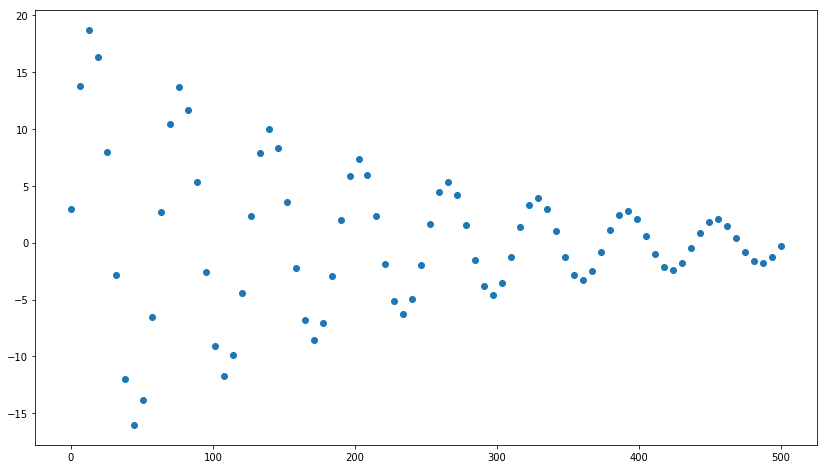

Intermediate parameters values: θ_1 = 1.98019801980198	θ_2 = -0.9900990099009901
Regression model: y = (1.98019801980198) * x1 + (-0.9900990099009901) * x2


,i,t,x(t),x(t+1),x(t+2)
0,1,0,5.000000,7.000000,2.97
1,2,6,15.514879,17.135487,13.76
2,3,12,19.560926,20.217068,18.72
3,4,18,16.016072,15.520598,16.35
4,5,25,6.676531,5.286058,7.99
5,6,31,-4.596447,-6.305073,-2.86
6,7,37,-13.452646,-14.818532,-11.97
7,8,44,-16.715857,-17.247299,-16.02
8,9,50,-13.504159,-13.052839,-13.82
9,10,56,-5.420258,-4.215867,-6.56


In [53]:
config = OscillationModelConfig()
config.show()

plt.scatter(config.t, config.y)
plt.show()
print('Intermediate parameters values: θ_1 = {}\tθ_2 = {}'.format(*config.theta))
print('Regression model: y = ({}) * x1 + ({}) * x2'.format(*config.theta))
config.df.head(10)

## Робота алгоритму МНКО

Recurrent Least Squares Method
	Step 1
h_1:		[0]
eta_1:		3496.0743024036183
alpha_1:	[0]
beta_1:		3496.0743024036183
gamma_1:	3349.3120437748094
nu_1:		[0.95802084]
> θ_1: [0.95802084]
> H_1_inv:
[[0.00028604]]
> RSS_1: 29.453858680093163
	Step 2
h_2:		[3609.56221018]
eta_2:		3756.7578218698554
alpha_2:	[1.03246153]
beta_2:		[[30.02371322]]
gamma_2:	3428.2987274811694
nu_2:		[[-0.99045368]]
> θ_2: [ 1.98062616 -0.99045368]
> H_2_inv:
[[ 0.03579053 -0.0343882 ]
 [-0.0343882   0.03330701]]
> RSS_2: 0.0006414646992354278

INTERMEDIATE PARAMETERS
True values:	θ_1 = 1.98019801980198	θ_2 = -0.9900990099009901
Estimates:	θ_1* = 1.9806261560117218	θ_2* = -0.9904536768605774

INITIAL PARAMETERS
True values:	δ = 0.005			ω0^2 = 0.01
Estimates:	δ* = 0.004819166894145632	ω0^2* = 0.009922241775108143


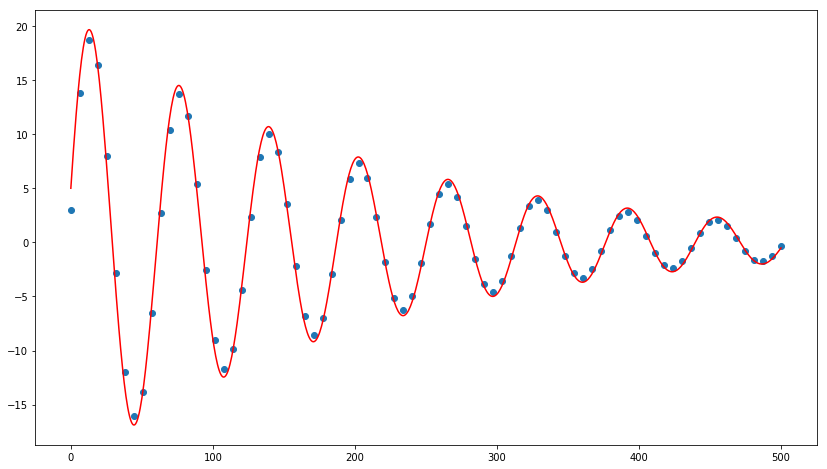

In [43]:
config.run_single_RMNK(verbose=True, deep_verbose=True)

## Таблиця залежності оцінок від рівня шуму

Розміри вибірки: [30, 80, 150]

Округлення (кількість знаків після коми) до: [0, 2, 5]

In [44]:
forward_df = config.run_grid_RMNK(verbose=False)
forward_df

,C,num_samples,θ_1,θ_1*,θ_2,θ_2*,δ,δ*,ω0_sqr,ω0_sqr*
0,0.0,30.0,1.980198,2.092809,-0.990099,-1.100300,0.005,-0.045579,0.01,0.006809
1,0.0,80.0,1.980198,1.959643,-0.990099,-0.966105,0.005,0.017542,0.01,0.006689
2,0.0,150.0,1.980198,1.985392,-0.990099,-0.991847,0.005,0.004110,0.01,0.006507
3,2.0,30.0,1.980198,1.980402,-0.990099,-0.990257,0.005,0.004919,0.01,0.009952
4,2.0,80.0,1.980198,1.980626,-0.990099,-0.990454,0.005,0.004819,0.01,0.009922
5,2.0,150.0,1.980198,1.980007,-0.990099,-0.989910,0.005,0.005096,0.01,0.010005
6,5.0,30.0,1.980198,1.980197,-0.990099,-0.990098,0.005,0.005001,0.01,0.010000
7,5.0,80.0,1.980198,1.980199,-0.990099,-0.990100,0.005,0.005000,0.01,0.010000
8,5.0,150.0,1.980198,1.980197,-0.990099,-0.990098,0.005,0.005000,0.01,0.010000


Розглянемо для апроксимації центральною різницею:

$ \Rightarrow \left \{ \begin{array}{ll}
                            x(t+1)-2x(t)+x(t-1)+\delta[x(t+1)-x(t-1)]+\omega_0^2 x(t)=0 \\
                            x(0) = x_0\\
                            x(1) = x(0) + x'(0) = x_0 + x'_0
                        \end{array} \right. $

$ \iff \left \{ \begin{array}{ll}
                    x(t+2)=\frac{2-\omega_0^2}{1+\delta}x(t+1)-\frac{1-\delta}{1+\delta}x(t) \\
                    x(0) = x_0\\
                    x(1) = x_0 + x'_0
                 \end{array} \right. $

Отже, лінійна регресійна залежність виглядає таким чином:

$ \left \{ \begin{array}{ll}
                  y_i = \theta_1 x_{i1} +  \theta_2 x_{i2} + \xi_i\\
                  \theta_1 = \frac{2-\omega_0^2}{1+\delta}\\
                  \theta_2 = -\frac{1-\delta}{1+\delta}\\
                  E\xi = 0_n;\enspace cov(\xi) = \sigma^2I_n
                \end{array}
              \right. $

## Генерування вибірки

Initial parameters:	δ = 0.005
			ω0^2 = 0.01              
			x0 = 5
			x00 = 2

Noise generation: C = 2
Sample length: n = 80
Time starting from 0 to 500                with discretization frequency 6



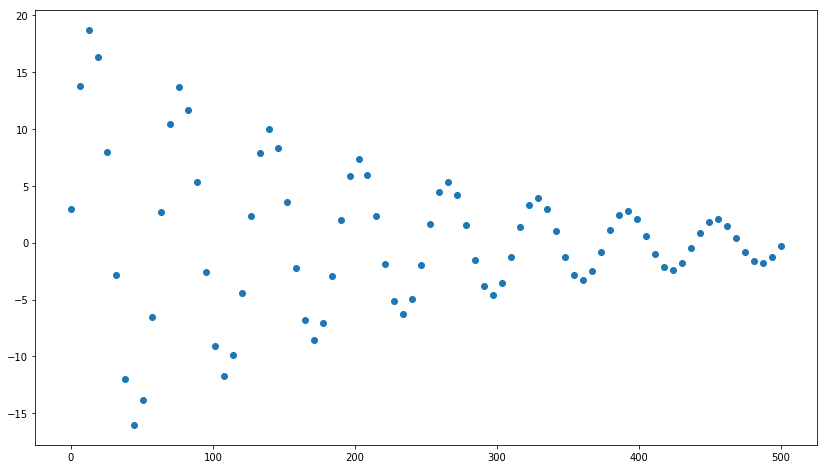

Intermediate parameters values: θ_1 = 1.9800995024875623	θ_2 = -0.9900497512437811
Regression model: y = (1.9800995024875623) * x1 + (-0.9900497512437811) * x2


,i,t,x(t),x(t+1),x(t+2)
0,1,0,5.000000,7.000000,2.97
1,2,6,15.514879,17.135487,13.76
2,3,12,19.560926,20.217068,18.72
3,4,18,16.016072,15.520598,16.35
4,5,25,6.676531,5.286058,7.99
5,6,31,-4.596447,-6.305073,-2.86
6,7,37,-13.452646,-14.818532,-11.97
7,8,44,-16.715857,-17.247299,-16.02
8,9,50,-13.504159,-13.052839,-13.82
9,10,56,-5.420258,-4.215867,-6.56


In [50]:
config = OscillationModelConfig(difference='center')
config.show()

plt.scatter(config.t, config.y)
plt.show()
print('Intermediate parameters values: θ_1 = {}\tθ_2 = {}'.format(*config.theta))
print('Regression model: y = ({}) * x1 + ({}) * x2'.format(*config.theta))
config.df.head(10)

## Робота алгоритму МНКО

Recurrent Least Squares Method
	Step 1
h_1:		[0]
eta_1:		3496.0743024036183
alpha_1:	[0]
beta_1:		3496.0743024036183
gamma_1:	3349.2782321079894
nu_1:		[0.95801117]
> θ_1: [0.95801117]
> H_1_inv:
[[0.00028604]]
> RSS_1: 29.447942916061038
	Step 2
h_2:		[3609.56221018]
eta_2:		3756.7578218698554
alpha_2:	[1.03246153]
beta_2:		[[30.02371322]]
gamma_2:	3428.266809326686
nu_2:		[[-0.99035405]]
> θ_2: [ 1.98051363 -0.99035405]
> H_2_inv:
[[ 0.03579053 -0.0343882 ]
 [-0.0343882   0.03330701]]
> RSS_2: 0.0006504761399703796

INTERMEDIATE PARAMETERS
True values:	θ_1 = 1.9800995024875623	θ_2 = -0.9900497512437811
Estimates:	θ_1* = 1.980513626457381	θ_2* = -0.9903540525860997

INITIAL PARAMETERS
True values:	δ = 0.005			ω0^2 = 0.01
Estimates:	δ* = 0.004846347513582927	ω0^2* = 0.009888116253420117


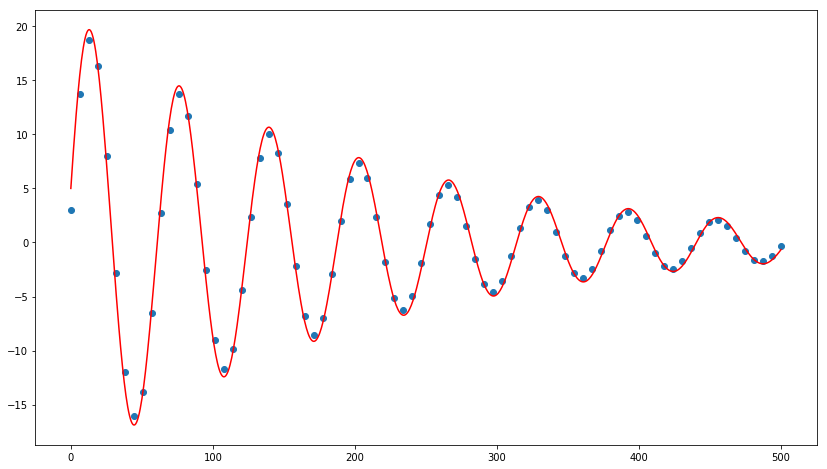

In [33]:
config.run_single_RMNK(verbose=True, deep_verbose=True)

## Таблиця залежності оцінок від рівня шуму

Розміри вибірки: [30, 80, 150]

Округлення (кількість знаків після коми) до: [0, 2, 5]

In [34]:
center_df = config.run_grid_RMNK(verbose=False)
center_df

,C,num_samples,θ_1,θ_1*,θ_2,θ_2*,δ,δ*,ω0_sqr,ω0_sqr*
0,0.0,30.0,1.9801,2.092809,-0.99005,-1.100300,0.005,-0.047755,0.01,0.007134
1,0.0,80.0,1.9801,1.959643,-0.99005,-0.966105,0.005,0.017240,0.01,0.006574
2,0.0,150.0,1.9801,1.985392,-0.99005,-0.991847,0.005,0.004093,0.01,0.006481
3,2.0,30.0,1.9801,1.980023,-0.99005,-0.989908,0.005,0.005071,0.01,0.009935
4,2.0,80.0,1.9801,1.980514,-0.99005,-0.990354,0.005,0.004846,0.01,0.009888
5,2.0,150.0,1.9801,1.979936,-0.99005,-0.989861,0.005,0.005095,0.01,0.009975
6,5.0,30.0,1.9801,1.980099,-0.99005,-0.990050,0.005,0.005000,0.01,0.010000
7,5.0,80.0,1.9801,1.980099,-0.99005,-0.990050,0.005,0.005000,0.01,0.010000
8,5.0,150.0,1.9801,1.980100,-0.99005,-0.990050,0.005,0.005000,0.01,0.010000


## Об'єднана таблиця для двох видів апроксимацій

In [35]:
center_df['difference'] = 'center'
forward_df['difference'] = 'forward'
pd.concat([center_df, forward_df], axis=0).sort_values(by=['C',
                                                           'num_samples',
                                                           'difference'])

,C,num_samples,θ_1,θ_1*,θ_2,θ_2*,δ,δ*,ω0_sqr,ω0_sqr*,difference
0,0.0,30.0,1.980100,2.092809,-0.990050,-1.100300,0.005,-0.047755,0.01,0.007134,center
0,0.0,30.0,1.980198,2.092809,-0.990099,-1.100300,0.005,-0.045579,0.01,0.006809,forward
1,0.0,80.0,1.980100,1.959643,-0.990050,-0.966105,0.005,0.017240,0.01,0.006574,center
1,0.0,80.0,1.980198,1.959643,-0.990099,-0.966105,0.005,0.017542,0.01,0.006689,forward
2,0.0,150.0,1.980100,1.985392,-0.990050,-0.991847,0.005,0.004093,0.01,0.006481,center
2,0.0,150.0,1.980198,1.985392,-0.990099,-0.991847,0.005,0.004110,0.01,0.006507,forward
3,2.0,30.0,1.980100,1.980023,-0.990050,-0.989908,0.005,0.005071,0.01,0.009935,center
3,2.0,30.0,1.980198,1.980402,-0.990099,-0.990257,0.005,0.004919,0.01,0.009952,forward
4,2.0,80.0,1.980100,1.980514,-0.990050,-0.990354,0.005,0.004846,0.01,0.009888,center
4,2.0,80.0,1.980198,1.980626,-0.990099,-0.990454,0.005,0.004819,0.01,0.009922,forward


# Дослідження закономірностей селекції оптимальних моделей за різними критеріями

Розглянемо настпуні критерії

$ RSS(s) $

RSS(s) (як функція дискретного аргумента s) є строго спадною. Тобто при підвищенні складності (число аргументів або регресорів) моделі, наприклад, за рахунок шумів, значення цієї функції зменшиться. Тому її не можна використовувати в якості критерія оптимальності моделі.

Тож введемо такі два критерії, які будемо використовувати для селекції оптимальних моделей

$ C_p(s) = RSS(s) + 2s - \text{спрощений критерій Маллоуза} $

$ FPE(s) = \frac{n + s}{n - s} RSS(s) - \text{критерій фінальної помилки передбачення Акаіке} $

## Генерування вибірки

In [57]:
config = ModelConfig()

config.generate_noise_and_output()
config.show()

Sample length: n = 10
Noise generation: σ = 0.01
X[:10]:
[[1.73668737 1.50585058 0.31056462 0.18813317 1.99583863]
 [1.7858896  1.75296013 1.90438563 0.7997838  1.49062902]
 [0.65435252 1.90923055 0.69667463 0.64954648 1.16825046]
 [0.53700924 1.21084708 1.37475644 0.24417564 1.17313647]
 [1.89767579 1.28953789 1.09866645 1.75876781 0.21103585]
 [0.9076669  1.87073201 1.70428403 1.13870423 0.09550767]
 [1.53762501 0.46425538 0.83292054 0.14208794 0.43379439]
 [1.47742416 1.4377131  1.48558802 1.63378765 0.43841198]
 [0.48782724 1.8788578  0.4686912  0.06179599 1.95233644]
 [0.71660109 1.47603646 1.94460102 1.62213318 0.09699913]]
y[:10]:
[ 2.51536791  3.73591858 -1.16005759  0.55543206  4.2129033   0.67842311
  4.52304823  3.04907493 -1.83627147  1.15644467]


## Результати роботи МНКО для кожної складності моделі

Розміри вибірки:  [10, 30, 100]

Дисперсії: [0.1, 0.5, 1]

--------------------------------------------------------------
			SAMPLE #1
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 10
Noise generation: σ = 0.1
X[:10]:
[[1.95191147 0.71759106 0.74162857 1.01249299 1.54290295]
 [0.50884353 1.0732522  0.50439115 1.07248946 1.40272645]
 [0.52168261 0.65630253 1.92638283 0.34524156 0.70328861]
 [1.52084804 0.76256488 1.82966069 1.76696366 0.73812205]
 [1.35273425 0.73240397 0.51069763 1.52041477 0.65890695]
 [0.73252195 0.06037088 0.6727658  0.62831626 1.96131359]
 [0.35994519 0.88229126 0.01859418 0.97133137 0.64410817]
 [1.47022347 1.51563722 0.4327667  1.88764468 0.84701875]
 [1.26077307 1.2630475  0.28154799 1.10985245 1.23263706]
 [0.14747575 1.2937843  0.83445624 0.28536253 1.74363149]]
y[:10]:
[ 5.22963525 -0.0922206   2.32289578  4.92617069  3.17762795  2.90458662
 -0.6321925   1.8426902   1.51299571 -1.23035602]

		RLSM ITERATIONS
	Step 1
> θ_1: [2.2826522]
> H_1_inv:
[[0.07738198

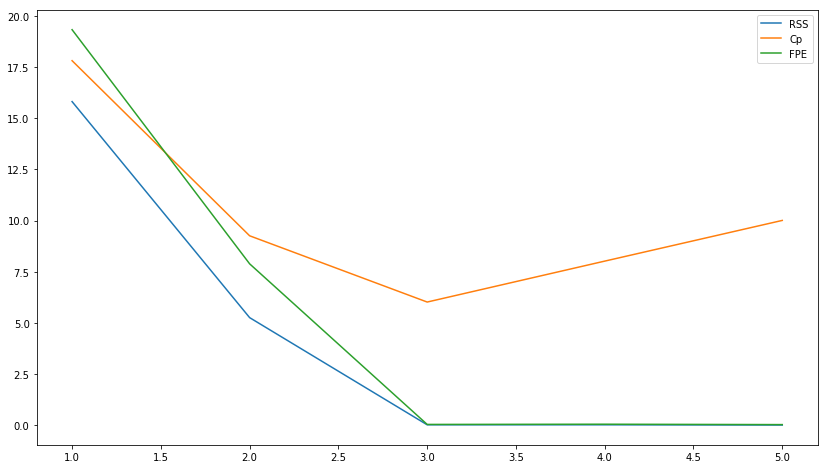

     s        RSS         Cp        FPE
0  1.0  15.817829  17.817829  19.332902
1  2.0   5.259862   9.259862   7.889794
2  3.0   0.021664   6.021664   0.040233
3  4.0   0.021643   8.021643   0.050500
4  5.0   0.010591  10.010591   0.031772
s* by Cp:  3
s* by FPE: 5

--------------------------------------------------------------
			SAMPLE #2
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 10
Noise generation: σ = 0.5
X[:10]:
[[0.44490375 0.5562596  1.78620935 1.02799883 0.73876544]
 [1.53689161 0.44185679 0.98561742 1.99562757 1.78985237]
 [0.11266623 1.18120965 0.77099569 0.33689549 1.61784094]
 [0.04334364 1.49458992 0.94030307 0.60366945 0.81278623]
 [1.22560257 0.63835883 0.14902097 1.81421134 0.35791327]
 [0.82447536 0.13854547 1.64414366 1.0395771  1.49519218]
 [1.98976995 0.92271415 0.17160272 0.73181318 0.33065302]
 [1.19864569 1.5489259  1.01214743 0.17892453 1.86093935]
 [0.18888557 1.28254063 0.42276585 1.02551165 1.62

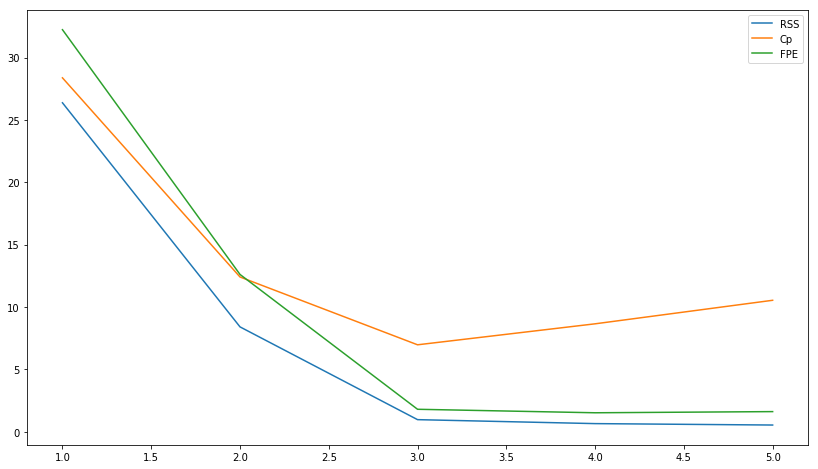

     s        RSS         Cp        FPE
0  1.0  26.369721  28.369721  32.229659
1  2.0   8.406210  12.406210  12.609315
2  3.0   0.969697   6.969697   1.800866
3  4.0   0.651672   8.651672   1.520567
4  5.0   0.537956  10.537956   1.613867
s* by Cp:  3
s* by FPE: 4

--------------------------------------------------------------
			SAMPLE #3
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 10
Noise generation: σ = 1
X[:10]:
[[1.15191816 1.45643424 0.35217446 0.02250187 0.46906672]
 [0.87142405 1.71602002 0.23741228 1.91346098 1.25294578]
 [1.19675046 1.06696338 1.15525912 1.90735532 1.28356638]
 [0.4252188  0.54285699 0.54645173 0.29713495 0.81567826]
 [0.43633386 0.16555404 0.96202474 1.30732779 1.40734285]
 [1.85207993 0.06509364 0.4754615  0.55370487 1.84213157]
 [1.43449053 1.0827649  1.73459024 1.85322637 0.82716187]
 [1.01319784 0.73269749 1.49235862 1.60237374 0.13920351]
 [1.0218554  1.81670179 1.28545801 0.59587998 1.9850

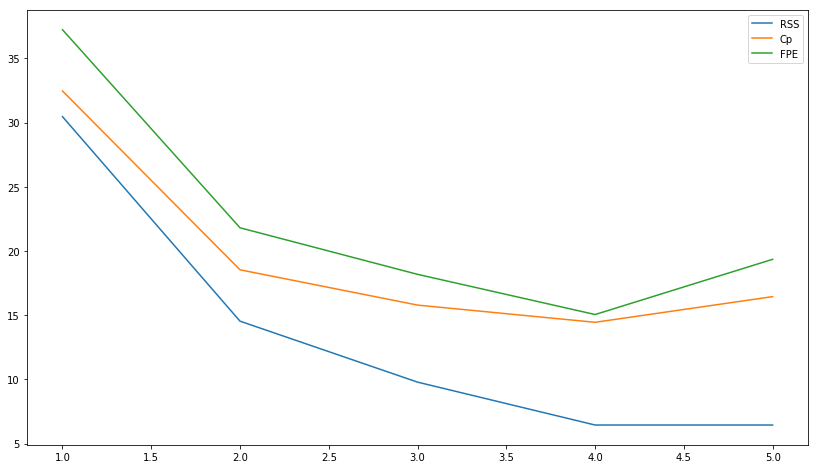

     s        RSS         Cp        FPE
0  1.0  30.471366  32.471366  37.242781
1  2.0  14.543584  18.543584  21.815377
2  3.0   9.794363  15.794363  18.189531
3  4.0   6.453945  14.453945  15.059206
4  5.0   6.453174  16.453174  19.359521
s* by Cp:  4
s* by FPE: 4

--------------------------------------------------------------
			SAMPLE #4
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 30
Noise generation: σ = 0.1
X[:10]:
[[1.78895588 1.59949562 1.40437321 1.22110738 0.12879088]
 [0.73417897 1.38847632 0.78901007 0.72390741 1.90866852]
 [0.64569711 1.71391797 1.59918754 0.52032618 0.47240112]
 [1.34221515 1.13311564 1.74058723 1.89922247 0.63727975]
 [0.94740442 1.27181536 0.83296458 0.35638952 0.42031266]
 [0.24989982 1.63804813 0.66615332 0.38525002 1.07991883]
 [0.19459671 0.27985943 1.2476181  0.89060791 0.17953126]
 [0.7766236  1.53571282 1.55816938 1.59752367 0.56289956]
 [1.31898102 1.82000028 1.42494505 1.17305576 0.33

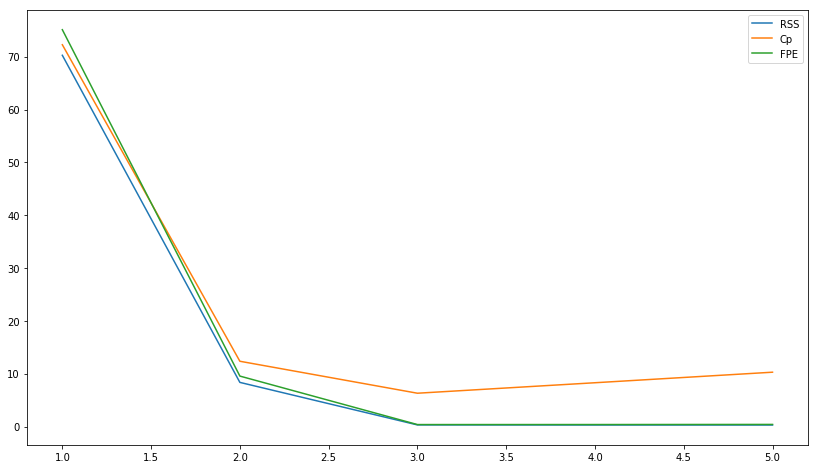

     s        RSS         Cp        FPE
0  1.0  70.266653  72.266653  75.112629
1  2.0   8.356445  12.356445   9.550223
2  3.0   0.306810   6.306810   0.374990
3  4.0   0.290657   8.290657   0.380090
4  5.0   0.286005  10.286005   0.400407
s* by Cp:  3
s* by FPE: 3

--------------------------------------------------------------
			SAMPLE #5
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 30
Noise generation: σ = 0.5
X[:10]:
[[0.02396666 1.67308213 0.67249438 1.63132652 0.58696408]
 [1.17483295 1.81346116 1.21940304 0.80288863 1.90558489]
 [0.86292211 0.87526385 1.8101362  1.82669583 1.07900791]
 [1.74206812 1.69375745 1.43023733 0.18985728 0.26376374]
 [1.98336275 1.38534272 0.33748498 0.8043599  1.52194884]
 [0.11995156 0.42336856 0.17899684 0.9170537  1.28925841]
 [0.96132634 0.14431882 1.37886409 0.17072727 1.99068301]
 [0.48660254 1.07646781 0.02532161 0.94359251 0.18737242]
 [0.16999782 0.40515554 1.11179407 1.35139663 1.15

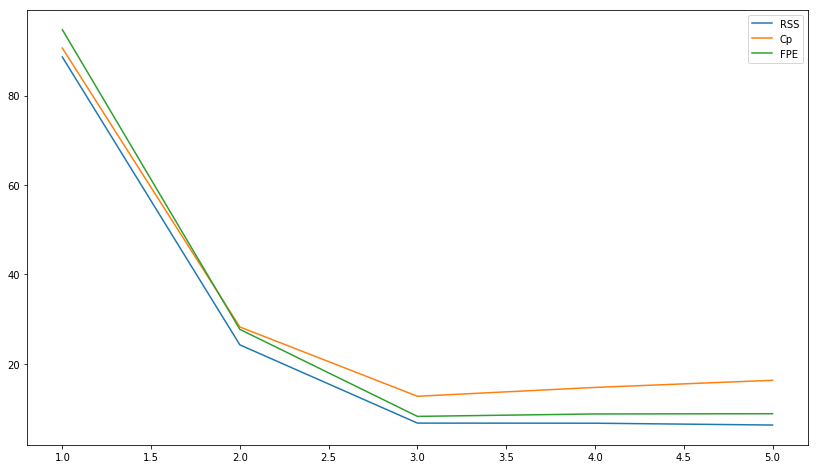

     s        RSS         Cp        FPE
0  1.0  88.608298  90.608298  94.719215
1  2.0  24.247839  28.247839  27.711816
2  3.0   6.754904  12.754904   8.255994
3  4.0   6.730750  14.730750   8.801750
4  5.0   6.323582  16.323582   8.853015
s* by Cp:  3
s* by FPE: 3

--------------------------------------------------------------
			SAMPLE #6
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 30
Noise generation: σ = 1
X[:10]:
[[0.75633333 1.59531568 1.12499448 0.1987481  0.12264195]
 [1.59118894 1.76156749 1.02092335 0.50113363 1.4504381 ]
 [1.71062565 0.87568437 0.50639907 1.59417367 0.61372572]
 [1.39269232 0.21013205 1.5262825  0.68486409 0.00545476]
 [1.85649845 0.20039125 1.55541919 1.17186744 1.70731024]
 [0.443081   1.58063351 0.98377752 0.43780707 1.70026275]
 [1.18895429 1.57873745 0.81870627 1.10492141 1.96871433]
 [1.67476515 1.51379129 0.66316507 1.32247588 0.98048234]
 [0.05199893 0.26958089 1.1601274  0.04997674 1.6371

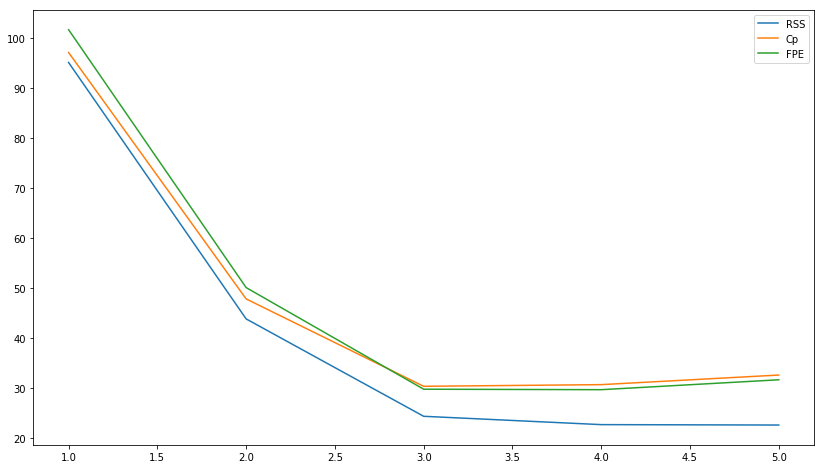

     s        RSS         Cp         FPE
0  1.0  95.157813  97.157813  101.720421
1  2.0  43.864488  47.864488   50.130843
2  3.0  24.381191  30.381191   29.799234
3  4.0  22.714907  30.714907   29.704110
4  5.0  22.633345  32.633345   31.686684
s* by Cp:  3
s* by FPE: 4

--------------------------------------------------------------
			SAMPLE #7
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 100
Noise generation: σ = 0.1
X[:10]:
[[0.2027132  1.17656488 0.06498793 1.08635172 1.59955731]
 [0.1624782  1.71796429 1.39902322 0.8258002  0.63475532]
 [1.65935147 0.99723663 0.62746576 1.3598635  0.43696061]
 [1.04690872 1.01226616 0.06763262 0.1304548  0.73817971]
 [0.85238545 1.36472782 1.5264632  0.21193714 0.53733576]
 [0.33784429 0.37115448 0.35620712 0.10672892 0.17510387]
 [0.47057115 0.40048594 1.6511029  1.51991708 1.00281774]
 [1.88163309 0.79177427 0.88876374 1.97258648 0.99840216]
 [1.55509218 1.45766825 1.05758475 0.344752

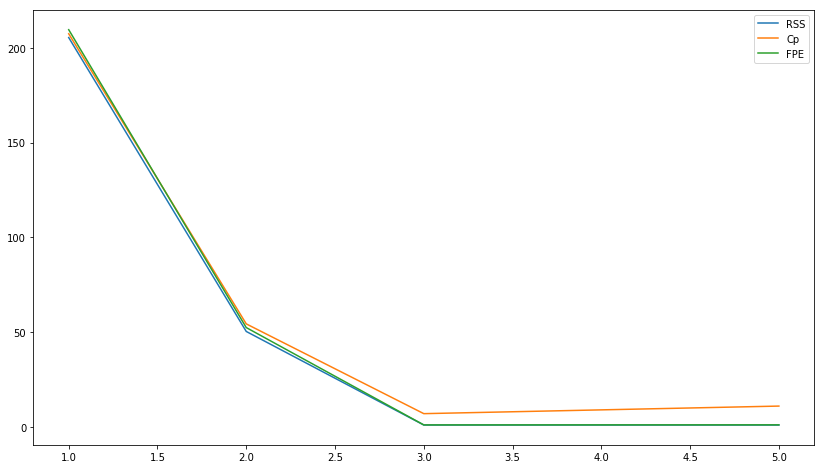

     s         RSS          Cp         FPE
0  1.0  205.427218  207.427218  209.577262
1  2.0   50.318785   54.318785   52.372613
2  3.0    0.942650    6.942650    1.000958
3  4.0    0.940546    8.940546    1.018925
4  5.0    0.936544   10.936544    1.035127
s* by Cp:  3
s* by FPE: 3

--------------------------------------------------------------
			SAMPLE #8
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 100
Noise generation: σ = 0.5
X[:10]:
[[0.62265249 1.25524974 0.08432176 0.65935776 0.56725324]
 [1.08699656 0.82484543 1.70953428 1.559412   0.42524941]
 [0.8587916  1.05179646 0.31005348 1.45225748 1.98129575]
 [1.07490329 1.85239664 0.52176475 1.49427952 0.34500026]
 [1.32316989 0.15133781 0.92352499 1.81758883 0.0892271 ]
 [1.15510802 1.37733609 1.39512854 1.20040266 0.22016103]
 [0.58511917 1.15493213 1.44111759 0.90994869 0.47947511]
 [1.95004251 1.64645122 1.96178832 1.66520697 1.43791658]
 [0.89120289 0.38210101 0.54578

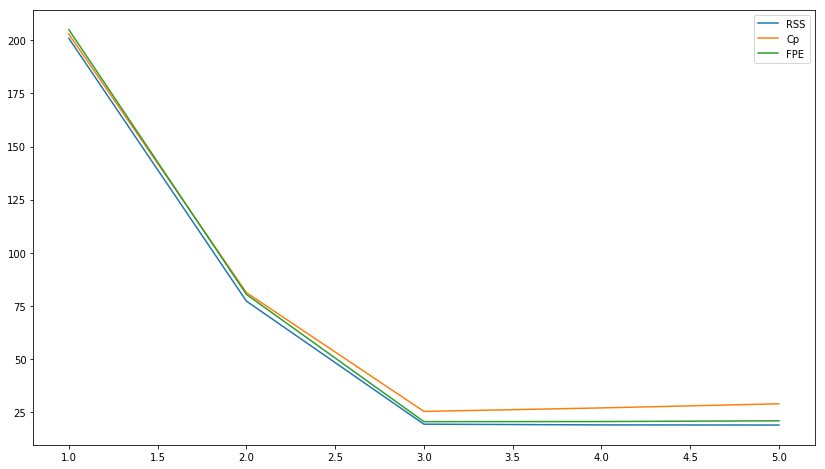

     s         RSS          Cp         FPE
0  1.0  200.973707  202.973707  205.033782
1  2.0   77.273149   81.273149   80.427155
2  3.0   19.324478   25.324478   20.519806
3  4.0   18.978029   26.978029   20.559531
4  5.0   18.919554   28.919554   20.911086
s* by Cp:  3
s* by FPE: 3

--------------------------------------------------------------
			SAMPLE #9
--------------------------------------------------------------
		CONFUGURATIONS & DATA
Sample length: n = 100
Noise generation: σ = 1
X[:10]:
[[1.36595017 1.82909516 1.20310471 0.27331394 1.08695641]
 [0.1628522  1.4157397  0.49697568 1.9298641  0.62346067]
 [1.34280995 0.83942228 1.0756245  0.98920397 1.14885782]
 [0.77632551 0.05402871 1.52539796 1.11130083 0.3866685 ]
 [0.12878237 0.02461247 1.94639806 0.83317002 0.47027548]
 [1.06606705 1.24460385 1.15240277 0.63969436 0.14704133]
 [1.30748209 0.45899965 1.03216374 1.38275888 0.15408168]
 [1.87110996 0.65924059 1.07370474 1.90772128 1.64997828]
 [0.27464996 1.41251082 1.9540569

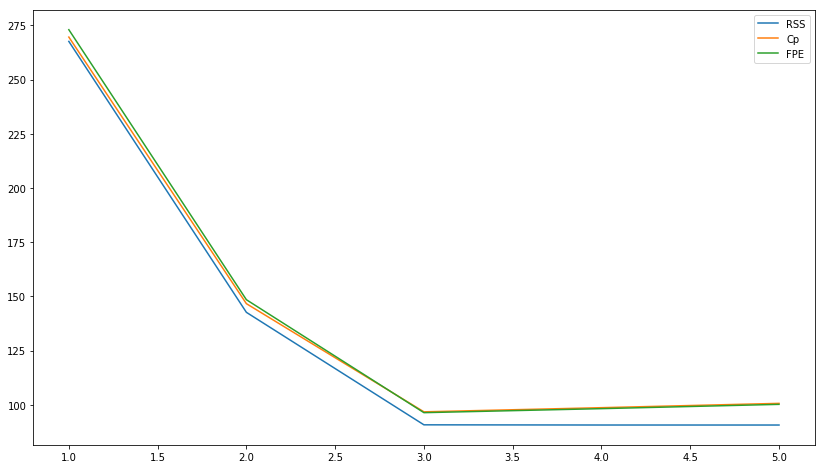

     s         RSS          Cp         FPE
0  1.0  267.619539  269.619539  273.025995
1  2.0  142.630275  146.630275  148.451919
2  3.0   90.729076   96.729076   96.341184
3  4.0   90.641076   98.641076   98.194499
4  5.0   90.633444  100.633444  100.173806
s* by Cp:  3
s* by FPE: 3



In [58]:
config.run_grid_RMNK_model_selection()

## Результати роботи МНКО для кожної складності моделі з перестановками

Оскільки алгоритм МНКО діє послідовно в порядку розташування регресорів, має сенс будувати моделі для перестановок (найвпливовіший регресор, наприклад, може бути розташований в кінці, а найменш впливовий - на початку; це потрібно відслідковувати).

Тож виконаємо МНКО для однієї вибірки довжини n = 100, з дисперсією шуму $\sigma$ = 1 з перестановкою регресорів.

In [64]:
config.run_single_full_RMNK_model_selection(sort_values_by=['Cp', 'FPE'])
# ['s', 'Cp', 'FPE']

,s,regressors,RSS,Cp,FPE
0,3.0,"[1, 2, 3]",90.729076,96.729076,96.341184
1,4.0,"[1, 2, 3, 4]",90.641076,98.641076,98.194499
2,4.0,"[1, 2, 3, 5]",90.725980,98.725980,98.286479
3,5.0,"[1, 2, 3, 4, 5]",90.633444,100.633444,100.173806
4,4.0,"[1, 2, 4, 5]",131.678290,139.678290,142.651481
5,3.0,"[1, 2, 4]",134.881135,140.881135,143.224298
6,3.0,"[1, 2, 5]",136.992161,142.992161,145.465902
7,2.0,"[1, 2]",142.630275,146.630275,148.451919
8,4.0,"[1, 3, 4, 5]",234.815928,242.815928,254.383922
9,3.0,"[1, 3, 4]",239.330532,245.330532,254.134482


В даному випадку за другим критерієм оптимальною є модель складності 3 з регресорами 1, 2, 3. 

# Висновки

# Код програми

## Імпорт необхідних бібліотек; налаштування

In [20]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from itertools import permutations
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

import plotly.offline as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

## Реалізація МНКО

In [21]:
def RMNK(X, y, s=None, sigma_estimation=1
         verbose=False, deep_verbose=False, create_dataframe=False):
    assert X.ndim == 2 and X.shape[1] > 0
    m = X.shape[1]
    if m > 1:
        if create_dataframe:
            w, H_inv, RSS, df = RMNK(X[:,:-1], y, s, sigma_estimation
                                     verbose, deep_verbose, create_dataframe)
            if s is not None and m > s:
                return w, H_inv, RSS, df
        else:
            w, H_inv, RSS = RMNK(X[:,:-1], y, s, sigma_estimation,
                                 verbose, deep_verbose, create_dataframe)
            if s is not None and m > s:
                return w, H_inv, RSS
        # w is of shape = [m-1, 1]; H_inv is of shape = [m-1, m-1]    
        h = (X[:,:-1].T @ X[:,-1]).reshape(-1,1) # shape = [m-1, 1]
        eta = X[:,-1].T @ X[:,-1] # shape = [1, 1]
        alpha = H_inv @ h # shape = [m-1, 1]
        beta = eta - h.T @ alpha # shape = [1, 1]
        beta_inv = 1 / beta # shape = [1, 1]
        gamma = X[:,-1].T @ y # shape = [1, 1]
        nu = beta_inv * (gamma - h.T @ w) # shape = [1, 1]
        w = np.vstack((w - nu * alpha, nu))  # shape = [m, 1]
        H_next_inv = np.vstack((np.hstack((H_inv + beta_inv * alpha @ alpha.T,           
                                (- beta_inv * alpha).reshape(-1, 1))),
                               np.hstack((-beta_inv * alpha.T, beta_inv))))
        RSS_next = (RSS - nu.flatten() ** 2 * beta.flatten())[0]

    else: # 1
        H_inv = np.array([[0]])
        eta = beta = X[:,-1].T @ X[:,-1]
        beta_inv = 1 / beta
        alpha = h = np.array([0])
        gamma = X[:,-1].T @ y
        nu = np.array([beta_inv * gamma])
        w = np.array([nu])
        H_next_inv = np.array(beta_inv).reshape(1, 1)
        RSS_next = (y.T @ y - y.T @ X[:,-1].reshape(-1, 1) @ w)[0]
        if create_dataframe:
            df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
        
    if verbose:
        print('===============================================')
        print('\tStep {}'.format(m))
        print('===============================================')
        if deep_verbose:
            print('h_{}:\t\t{}'.format(m, h.reshape(-1,1)[:,0]))
            print('eta_{}:\t\t{}'.format(m, eta))
            print('alpha_{}:\t{}'.format(m, alpha.reshape(-1,1)[:,0]))
            print('beta_{}:\t\t{}'.format(m, beta))
            print('gamma_{}:\t{}'.format(m, gamma))
            print('nu_{}:\t\t{}'.format(m, nu))
            print('===============================================')
        print('> θ_{}: {}'.format(m, w[:, 0]))
        print('> H_{}_inv:\n{}'.format(m, H_next_inv))
        print('> RSS_{}: {}'.format(m, RSS_next))
    if create_dataframe:
        Cp = RSS_next + 2 * sigma_estimation * m
        n = y.shape[0]
        FPE = (n + m) / (n - m) * RSS_next
        df = df.append({'s': m, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE},
                       ignore_index=True)
        return w, H_next_inv, RSS_next, df
    return w, H_next_inv, RSS_next

## Модель Фергюльста: реалізація класу, методів, функцій

In [22]:
def Verhulst_model_equation(N, t, μ, k):
    return μ * N * (k - N)

class VerhulstModelConfig(): 
    k = 100
    μ = 0.0001
    N0 = 10
    t_start = 0
    t_end = 500
    num_samples = 50
    num_samples_grid = [10, 50, 100]
    C = 3
    C_grid = [0, 2, 5]

    def __init__(self):
        self.theta = self.init_to_inter_params()
        self.compile()
        
    def compile(self):
        self.h = int((self.t_end - self.t_start) / (self.num_samples - 1))
        self.t = np.linspace(self.t_start, self.t_end, num=self.num_samples)
        self.N = odeint(Verhulst_model_equation,
                        self.N0, self.t, (self.μ, self.k))
        self.create_data_sample()
        
    def recompile(self, C, num_samples):
        self.C = C
        self.num_samples = num_samples
        self.compile()
        
    def show(self):
        print('Initial parameters:\tμ = {}\n\t\t\t\
               k = {}\n\t\t\tN0 = {}\n'.format(self.μ, self.k, self.N0))
        print('Noise generation: C = {}'.format(self.C))
        print('Sample length: n = {}'.format(self.num_samples))
        print('Time starting from {} to {} \
               with discretization frequency {}\n'.format(self.t_start,
                                                          self.t_end,
                                                          self.h))
        
    def init_to_inter_params(self):
        w1 = self.μ * self.k + 1
        w2 = -self.μ
        return np.array([w1, w2])

    def inter_to_init_params(self, w1, w2):
        μ = - w2
        k = (1 - w1) / w2
        return μ, k
    
    def create_data_sample(self):
        self.df = pd.DataFrame()
        self.df['i'] = range(1, self.num_samples+1)
        self.df['t'] = list(map(int, self.t))
        self.df['N(t)'] = self.N.flatten()
        self.df['N^2(t)'] = np.square(self.N.flatten())
        self.df['N(t+1)'] = np.array(self.df[['N(t)','N^2(t)']]) @ self.theta
        self.df['N(t+1)'] = np.round(self.df['N(t+1)'], self.C)
        self.X = np.array(self.df[['N(t)', 'N^2(t)']])
        self.y = np.array(self.df['N(t+1)'])
        
    def plot_3D(self):
        trace1 = go.Scatter3d(
            x=self.df['N(t)'],
            y=self.df['N^2(t)'],
            z=self.df['N(t+1)'],
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5
                ),
                opacity=0.8
            )
        )

        data = [trace1]
        layout = go.Layout(
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0
            )
        )
        fig = go.Figure(data=data, layout=layout)
        py.iplot(fig, filename='simple-3d-scatter')
        
    def run_single_RMNK(self, verbose=True, deep_verbose=True):
        print('Recurrent Least Squares Method')
        self.theta_pred = RMNK(self.X, self.y, verbose=verbose,
                               deep_verbose=deep_verbose)[0][:,0]
        self.μ_pred, self.k_pred = \
        self.inter_to_init_params(*self.theta_pred)
        print('=============================================')
        print('\nINTERMEDIATE PARAMETERS')
        print('True values:\tθ_1 = {}\tθ_2 = {}'.format(*self.theta))
        print('Estimates:\tθ_1* = {}\tθ_2* = {}'.format(*self.theta_pred))
        print('\nINITIAL PARAMETERS')
        print('True values:\tμ = {}\tk = {}'.format(self.μ, self.k))
        print('Estimates:\tμ* = {}\tk* = {}'.format(self.μ_pred, self.k_pred))
        plt.scatter(self.t, self.y)
        t_for_plot = np.linspace(self.t_start, self.t_end,
                                 num=self.num_samples * 10)
        plt.plot(t_for_plot, odeint(Verhulst_model_equation,
                                    self.N0, t_for_plot,
                                    (self.μ_pred, self.k_pred)), 'r')
        plt.show()
        
    def run_grid_RMNK(self, verbose=False):
        intermediate_estimates_df = pd.DataFrame(columns=['C', 'num_samples',
                                                          'θ_1', 'θ_1*',
                                                          'θ_2', 'θ_2*'])
        initial_estimates_df = pd.DataFrame(columns=['C', 'num_samples',
                                                     'μ', 'μ*', 'k', 'k*'])
        for C in self.C_grid:
            for num_samples in self.num_samples_grid: 
                self.recompile(C, num_samples)
                theta_pred = RMNK(self.X, self.y, verbose=False)[0][:,0]
                μ_pred, k_pred = self.inter_to_init_params(*theta_pred)
                intermediate_estimates_df = \
                intermediate_estimates_df.append({'C': self.C,
                                                  'num_samples': self.num_samples,
                                                  'θ_1': self.theta[0],
                                                  'θ_1*': theta_pred[0],
                                                  'θ_2': self.theta[1],
                                                  'θ_2*': theta_pred[1]},
                                                 ignore_index=True)
                initial_estimates_df = \
                initial_estimates_df.append({'C': self.C,
                                             'num_samples': self.num_samples,
                                             'μ': self.μ,
                                             'μ*': μ_pred,
                                             'k': self.k,
                                             'k*': k_pred},
                                             ignore_index=True)
                if verbose:
                    print('=============================================================')
                    print('C: {}\t num_samples: {}'.format(self.C,
                                                           self.num_samples))
                    print('\nINTERMEDIATE PARAMETERS')
                    print('Estimates:\tθ_1* = {: 12.8}\tθ_2* = \
                    {:12.8}'.format(*theta_pred))
                    print('\nINITIAL PARAMETERS')
                    print('Estimates:\tμ* = {: 12.8}\tk* = \
                    {: 12.8}'.format(μ_pred, k_pred))

        return pd.concat([intermediate_estimates_df,
                          initial_estimates_df[['μ', 'μ*', 'k', 'k*']]],
                         axis=1)

## Модель згасаючих коливань: реалізація класу, методів, функцій

In [27]:
def Oscillation_model_equation(x, t, δ, ω0_sqr):
    #x_0' = x_1 = x'
    #x_1' = x'' = - 2 * δ * x[1] - (ω0 ** 2) * x[0]
    return [x[1],  - 2 * δ * x[1] - ω0_sqr * x[0]]        

class OscillationModelConfig(): 
    δ = 0.005
    ω0_sqr = 0.01
    x0 = 5
    x00 = 2
    t_start = 0
    t_end = 500
    num_samples = 80
    num_samples_grid = [30, 80, 150]
    C = 2
    C_grid = [0, 2, 5]

    def __init__(self, difference='forward'):
        self.difference = difference
        self.theta = self.init_to_inter_params()
        self.compile()
        
    def compile(self):
        self.h = int((self.t_end - self.t_start) / (self.num_samples - 1))
        self.t = np.linspace(self.t_start, self.t_end, num=self.num_samples)
        self.x = odeint(Oscillation_model_equation,
                        np.array([self.x0, self.x00]),
                        self.t, (self.δ, self.ω0_sqr))
        self.x1 = self.x0 + self.x00
        self.x11 = self.x00
        self.x_1 = odeint(Oscillation_model_equation,
                          np.array([self.x1, self.x11]), self.t+1,
                          (self.δ, self.ω0_sqr))
        self.create_data_sample()
        
    def recompile(self, C, num_samples):
        self.C = C
        self.num_samples = num_samples
        self.compile()
        
    def show(self):
        print('Initial parameters:\tδ = {}\n\t\t\tω0^2 = {}\
              \n\t\t\tx0 = {}\n\t\t\tx00 = {}\n'.format(self.δ, self.ω0_sqr,
                                                        self.x0, self.x00))
        print('Noise generation: C = {}'.format(self.C))
        print('Sample length: n = {}'.format(self.num_samples))
        print('Time starting from {} to {} \
               with discretization frequency {}\n'.format(self.t_start,
                                                          self.t_end,
                                                          self.h))
        
    def init_to_inter_params(self):
        if self.difference == 'center':
            divider = 1 + self.δ
            w1 = (2 - self.ω0_sqr) / divider
            w2 = - (1 - self.δ) / divider
        elif self.difference == 'forward':
            divider = 1 + 2 * self.δ
            w1 = (2 + 2 * self.δ - self.ω0_sqr) / divider
            w2 = - 1 / divider
        return np.array([w1, w2])

    def inter_to_init_params(self, w1, w2):
        if self.difference == 'center':
            δ = (1 + w2) / (1 - w2)
            ω0_sqr = (2 - 2 * w1 - 2 * w2) / (1 - w2)
        elif self.difference == 'forward':
            δ = - (1 / w2 + 1) / 2
            ω0_sqr = 1 - 1 / w2 + w1 / w2
        return δ, ω0_sqr
    
    def create_data_sample(self):
        self.df = pd.DataFrame()
        self.df['i'] = range(1, self.num_samples+1)
        self.df['t'] = list(map(int, self.t))
        self.df['x(t)'] = self.x[:,0].flatten()
        self.df['x(t+1)'] = self.x_1[:,0].flatten()
        self.df['x(t+2)'] = np.array(self.df[['x(t)','x(t+1)']]) @ self.theta
        self.df['x(t+2)'] = np.round(self.df['x(t+2)'], self.C)
        self.X = np.array(self.df[['x(t)', 'x(t+1)']])
        self.y = np.array(self.df['x(t+2)'])
    
    def plot_3D(self):
        trace1 = go.Scatter3d(
            x=self.df['x(t)'],
            y=self.df['x(t+1)'],
            z=self.df['x(t+2)'],
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5
                ),
                opacity=0.8
            )
        )

        data = [trace1]
        layout = go.Layout(
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0
            )
        )
        fig = go.Figure(data=data, layout=layout)
        py.iplot(fig, filename='simple-3d-scatter')

    def run_single_RMNK(self, verbose=True, deep_verbose=False):
        print('Recurrent Least Squares Method')
        self.theta_pred = RMNK(self.X, self.y, verbose=verbose,
                               deep_verbose=deep_verbose)[0][:,0]
        self.δ_pred, self.ω0_sqr_pred = \
        self.inter_to_init_params(*self.theta_pred)
        print('=============================================')
        print('\nINTERMEDIATE PARAMETERS')
        print('True values:\tθ_1 = {}\tθ_2 = {}'.format(*self.theta))
        print('Estimates:\tθ_1* = {}\tθ_2* = {}'.format(*self.theta_pred))
        print('\nINITIAL PARAMETERS')
        print('True values:\tδ = {}\t\t\tω0^2 = {}'.format(self.δ,
                                                           self.ω0_sqr))
        print('Estimates:\tδ* = {}\tω0^2* = {}'.format(self.δ_pred,
                                                       self.ω0_sqr_pred))
        plt.scatter(self.t, self.y)
        t_for_plot = np.linspace(self.t_start, self.t_end,
                                 num=self.num_samples * 10)
        plt.plot(t_for_plot, odeint(Oscillation_model_equation, 
                                    np.array([self.x0, self.x00]),
                                    t_for_plot,
                                    (self.δ_pred,
                                     self.ω0_sqr_pred))[:,0], 'r')
        plt.show()
        
    def run_grid_RMNK(self, verbose=True):
        intermediate_estimates_df = pd.DataFrame(columns=['C', 'num_samples',
                                                          'θ_1', 'θ_1*',
                                                          'θ_2', 'θ_2*'])
        initial_estimates_df = pd.DataFrame(columns=['C', 'num_samples',
                                                     'δ', 'δ*',
                                                     'ω0_sqr', 'ω0_sqr*'])
        for C in self.C_grid:
            for num_samples in self.num_samples_grid: 
                self.recompile(C, num_samples)
                intermediate_estimates_df
                theta_pred = RMNK(self.X, self.y, verbose=False)[0][:,0]
                δ_pred, ω0_sqr_pred = self.inter_to_init_params(*theta_pred)
                intermediate_estimates_df = \
                intermediate_estimates_df.append({'C': self.C,
                                                  'num_samples': self.num_samples,
                                                  'θ_1': self.theta[0],
                                                  'θ_1*': theta_pred[0],
                                                  'θ_2': self.theta[1],
                                                  'θ_2*': theta_pred[1]},
                                                 ignore_index=True)
                initial_estimates_df = \
                initial_estimates_df.append({'C': self.C,
                                             'num_samples': self.num_samples,
                                             'δ': self.δ,
                                             'δ*': δ_pred,
                                             'ω0_sqr': self.ω0_sqr,
                                             'ω0_sqr*': ω0_sqr_pred},
                                             ignore_index=True)
                if verbose:
                    print('=============================================================')
                    print('C: {}\t num_samples: {}'.format(self.C,
                                                           self.num_samples))
                    print('\nINTERMEDIATE PARAMETERS')
                    print('Estimates:\tθ_1* = {: 12.8}\tθ_2* = \
                    {:12.8}'.format(*theta_pred))
                    print('\nINITIAL PARAMETERS')
                    print('Estimates:\tδ* = {: 12.8}\tk* = \
                    {: 12.8}'.format(δ_pred, ω0_sqr_pred))

        return pd.concat([intermediate_estimates_df,
                          initial_estimates_df[['δ', 'δ*', \
                                                'ω0_sqr', 'ω0_sqr*']]],
                         axis=1)

## Селекція оптимальних моделей: реалізація класу, методів, функцій

In [ ]:
class ModelConfig():
    m = 5
    n = 10
    n_grid = [10, 30, 100]
    theta = np.array([3, -2, 1, 0, 0])
    a = 0
    b = 2
    sigma = 0.01
    sigma_grid = [0.1, 0.5, 1]
    s = 5
    s_grid = [1, 2, 3, 4, 5]
    
    def __init__(self):
        self.compile()
        
    def generate_noise_and_output(self):
        self.ksi = np.random.normal(0, self.sigma, size=self.n)
        self.y = self.X @ self.theta + self.ksi
        
    def compile(self):
        self.X = np.random.uniform(self.a, self.b, size=(self.n, self.m))
        self.generate_noise_and_output()
        
    def recompile(self, n, sigma):
        self.n = n
        self.sigma = sigma
        self.compile()
        
    def show(self):
#         print('Regressors: m = {}'.format(self.m))
#         print('True parameters: θ = {}'.format(self.theta))
        print('Sample length: n = {}'.format(self.n))
        print('Noise generation: σ = {}'.format(self.sigma))
        print('X[:10]:\n{}'.format(self.X[:10]))
        print('y[:10]:\n{}'.format(self.y[:10]))

    def run_grid_RMNK_model_selection(self):
        for i, n in enumerate(self.n_grid): 
            for j, sigma in enumerate(self.sigma_grid):
                self.recompile(n, sigma)
                print('--------------------------------------------------------------')
                print('\t\t\tSAMPLE #{}'.format(i * len(self.n_grid) + j + 1))
                print('--------------------------------------------------------------')
                print('\t\tCONFUGURATIONS & DATA')
                self.show()
                print('\n\t\tRLSM ITERATIONS')
                theta_pred, _, _, df = RMNK(self.X, self.y, s=self.s,
                                            verbose=True,
                                            create_dataframe=True)
                print('\n\t\t\tRESULTS')
                print('\nPARAMETERS')
                print('True values:\tθ: {}'.format(self.theta))
                print('Estimates:\tθ*: {}'.format(theta_pred[:,0]))
                plt.plot(df['s'], df['RSS'], label='RSS')
                plt.plot(df['s'], df['Cp'], label='Cp')
                plt.plot(df['s'], df['FPE'], label='FPE')
                plt.legend()
                plt.show()
                print(df)
                print('s* by Cp:  {}'.format(np.array(df['Cp']).argmin()+1))
                print('s* by FPE: {}'.format(np.array(df['FPE']).argmin()+1))
                print()
    
    def run_single_full_RMNK_model_selection(self,
                                             sort_values_by=['Cp', 'FPE']):
        total_df = pd.DataFrame()
        for p in permutations(range(self.X.shape[1])):
            p = np.array(p)
            theta_pred, _, _, df = RMNK(self.X[:,p], self.y, s=self.s,
                                        verbose=False, create_dataframe=True)
            df['regressors'] = [str(sorted(p[:int(s)]+1)) for s in df.s]
            total_df = pd.concat([total_df, df], axis=0)

        total_df['RSS'] = np.round(total_df['RSS'], 6)
        total_df['Cp'] = np.round(total_df['Cp'], 6)
        total_df['FPE'] = np.round(total_df['FPE'], 6)
        total_df = total_df.drop_duplicates()
        total_df = total_df.sort_values(by=sort_values_by).reset_index()\
                   [['s', 'regressors', 'RSS', 'Cp', 'FPE']]
        return total_df